In [7]:

import geopandas as gpd
import numpy as np
import shapely

%matplotlib inline

In [2]:
comAreas = gpd.read_file("gn-philadelphia.geojson").to_crs(epsg = 2272)

In [3]:
comAreas

,fclass,name,countryCode,geonameid,created_at,cartodb_id,updated_at,fcode,lat,parents,adminCode4,lng,adminCode1,adminCode2,adminCode3,geometry
0,P,Pennypack Park,US,5205602,2013-03-19T16:41:50,1,2013-03-19T16:41:50,PPLX,40.069786,4560349,,-75.048898,PA,101,,(POLYGON ((2722036.062760848 286198.9503910378...
1,P,Overbrook,US,4560179,2013-03-19T16:41:50,2,2013-03-19T16:41:50,PPLX,39.978660,4560349,,-75.253486,PA,101,,(POLYGON ((2675428.758530947 244723.6094639027...
2,P,Southwest Germantown,US,None,2013-03-19T16:41:50,3,2013-03-19T16:41:50,PPLX,40.023592,4560349,,-75.167375,PA,101,,(POLYGON ((2693126.635370418 263782.3247815496...
3,P,East Parkside,US,None,2013-03-19T16:41:50,4,2013-03-19T16:41:50,PPLX,39.973968,4560349,,-75.206404,PA,101,,(POLYGON ((2683269.950312525 243935.0586012487...
4,P,Germany Hill,US,None,2013-03-19T16:41:50,5,2013-03-19T16:41:50,PPLX,40.036115,4560349,,-75.230422,PA,101,,(POLYGON ((2674819.183292897 265781.6211668954...
5,P,East Mount Airy,US,7147568,2013-03-19T16:41:50,6,2013-03-19T16:41:50,PPLX,40.059456,4560349,,-75.181127,PA,101,,(POLYGON ((2687707.005612776 269073.8495746106...
6,P,Mechanicsville,US,5200670,2013-03-19T16:41:50,7,2013-03-19T16:41:50,PPLX,40.107738,4560349,,-74.966341,PA,101,,"(POLYGON ((2747201.311938396 295229.252893628,..."
7,P,Dearnley Park,US,None,2013-03-19T16:41:50,8,2013-03-19T16:41:50,PPLX,40.044586,4560349,,-75.241909,PA,101,,(POLYGON ((2670918.960102169 266363.2634516729...
8,P,Wissahickon Hills,US,None,2013-03-19T16:41:50,9,2013-03-19T16:41:50,PPLX,40.040245,4560349,,-75.219074,PA,101,,(POLYGON ((2675861.635872839 267139.0576604852...
9,P,Wissinoming,US,5219843,2013-03-19T16:41:50,10,2013-03-19T16:41:50,PPLX,40.016766,4560349,,-75.061969,PA,101,,(POLYGON ((2724735.371331041 257020.9097062244...


In [13]:
parks  = gpd.read_file("PPR_Assets.geojson") .to_crs(epsg = 2272)

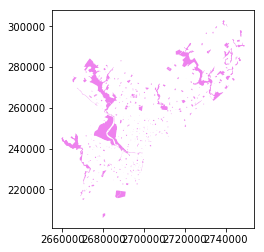

In [14]:
puu = parks.unary_union
cuu = comAreas.unary_union

parks.plot(color = "violet")

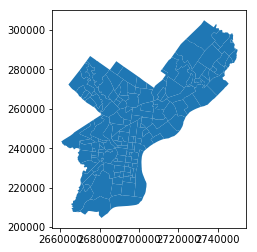

In [15]:
comAreas.plot()

In [16]:
comAreas["park_area"] = comAreas.centroid.buffer(500).intersection(puu).area

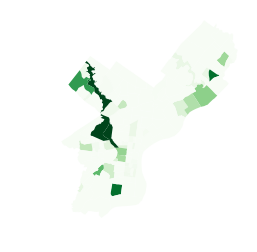

In [17]:
comAreas["distance"] = comAreas.centroid.distance(puu)

comAreas.plot(column = "park_area", cmap = "Greens").set_axis_off()

In [18]:
area=gpd.read_file("Boundaries-Community-Areas-current.geojson").to_crs(epsg=2272)

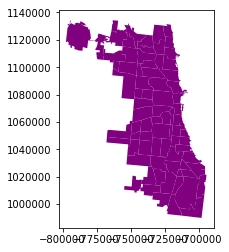

In [21]:
area.plot(color="purple")

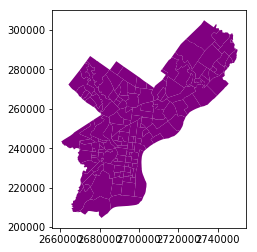

In [20]:
comAreas.plot(color="purple")

In [ ]:
puu=parks.unary_union
cuu=comAreas.unary_union
parks.plot(color="green")

In [22]:
comAreas["park_area"] = comAreas.centroid.buffer(500).intersection(puu).area
comAreas["distance"]  = comAreas.centroid.distance(puu)

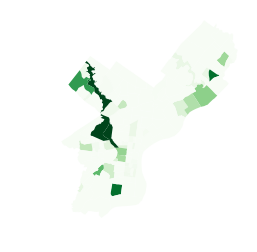

In [23]:
comAreas.plot(column = "park_area", cmap = "Greens").set_axis_off()

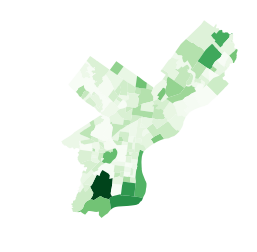

In [24]:
comAreas.plot(column = 'distance', cmap = 'Greens').set_axis_off()

In [ ]:
geo = [puu]
for r in range(1, 30):
    
    print(r, end = " ")
    g = []
    for i, park in parks.iterrows():
        b = r * 10 * (np.log(float(park.acres)) + 5.5)
        if b <= 0: print("yowza", b)
        g.append(park.geometry.buffer(b))

    geo.append(shapely.ops.unary_union(g).intersection(cuu))#.difference(geo[-1]))

for r in range(29, 0, -1):
    print(r, end = " ")
    geo[r] = geo[r].difference(geo[r-1])

In [ ]:

gdf = gpd.GeoDataFrame(geometry = geo, crs = {'init': 'epsg:2272', 'no_defs': True})
gdf["dist"] = gdf.index
ax = gdf.plot(column = "dist", cmap = "Greens_r")
ax.set_axis_off()
# ax.figure.savefig("parks_variable_buffer.pdf")